# Predicción de Precios de Vivienda
Análisis exploratorio de datos y entrenamiento de modelos de regresión para el problema de predicción de precios de vivienda.

## Configuración

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

housing_data_file = 'housing_data_large.csv'

## Carga y revisión preliminar de los datos

### Información básica

Número de ejemplos: 2000

Características:

* Numéricas
 * id: Identificador único de la propiedad.
 *   area_m2: Área construida en metros cuadrados.
 *   bedrooms: Número de habitaciones.
 *   bathrooms: Número de baños.
 *   parking: Número de espacios de parqueadero.
 *   stratum: Estrato socioeconómico (1-6).
 *   year_built: Año de construcción.
 *   price: Precio en pesos colombianos.
* Categóricas:   
 *   neighborhood: Barrio donde está ubicada la propiedad.
  
Variable objetivo: price

Valores nulos: No

In [2]:
housing_data = pd.read_csv(housing_data_file, encoding='cp1252')
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2000 non-null   int64 
 1   area_m2       2000 non-null   int64 
 2   bedrooms      2000 non-null   int64 
 3   bathrooms     2000 non-null   int64 
 4   parking       2000 non-null   int64 
 5   stratum       2000 non-null   int64 
 6   year_built    2000 non-null   int64 
 7   neighborhood  2000 non-null   object
 8   price         2000 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 140.8+ KB


### Estadísticos por característica

Rangos por características:
* area_m2: (50 - 199)
* bedrooms: (1 - 4)
* bathrooms: (1 - 3)
* parking: (0 - 2)
* stratum: (1 - 6)
* year_built: (1980 - 2022)
* price: (89'948.330 - 611'000.000)

Valores únicos de neighborhood: {'Bosa' 'Kennedy' 'Suba' 'Fontibón' 'Chapinero' 'Teusaquillo' 'Usaquén'}

Los estadísticos sugieren la no existencia de valores atípícos en el conjunto de datos.

In [10]:
print(housing_data['neighborhood'].unique())
housing_data.describe()

['Bosa' 'Kennedy' 'Suba' 'Fontibón' 'Chapinero' 'Teusaquillo' 'Usaquén']


,id,area_m2,bedrooms,bathrooms,parking,stratum,year_built,price
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,1000.500000,124.272000,2.506500,2.011000,0.996500,3.463500,2000.650500,4.103182e+08
std,577.494589,44.081068,1.136047,0.820497,0.811059,1.702386,12.372627,8.994833e+07
min,1.000000,50.000000,1.000000,1.000000,0.000000,1.000000,1980.000000,2.290000e+08
25%,500.750000,86.000000,1.000000,1.000000,0.000000,2.000000,1990.000000,3.360000e+08
50%,1000.500000,123.500000,3.000000,2.000000,1.000000,3.000000,2001.000000,4.099000e+08
75%,1500.250000,163.000000,4.000000,3.000000,2.000000,5.000000,2011.000000,4.878500e+08
max,2000.000000,199.000000,4.000000,3.000000,2.000000,6.000000,2022.000000,6.110000e+08


### Distribución por característica
Los histogramas sugieren distribuciones uniformes en las características, con excepción de price. Se evidencia nuevamente la no presencia de valores atípicos en ninguna de las características.


#### *area_m2*

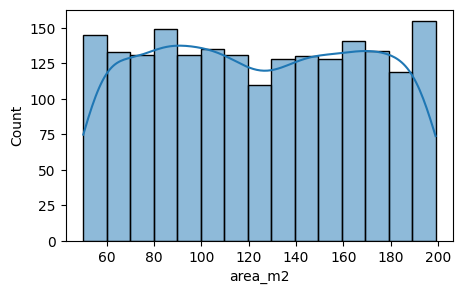

In [ ]:
column = 'area_m2'
plt.figure(figsize=(5, 3))
sns.histplot(housing_data[column], binwidth=10, kde=True)
plt.xlabel(column)
plt.show()

#### *bedrooms*



In [ ]:
column = 'bedrooms'
pd.concat([housing_data[column].value_counts(), housing_data[column].value_counts(normalize=True)], axis = 1).sort_index()


,count,proportion
bedrooms,,
1,518,0.2590
2,473,0.2365
3,487,0.2435
4,522,0.2610


#### *bathrooms*

In [ ]:
column = 'bathrooms'
pd.concat([housing_data[column].value_counts(), housing_data[column].value_counts(normalize=True)], axis = 1).sort_index()

,count,proportion
bathrooms,,
1,662,0.331
2,654,0.327
3,684,0.342


#### *parking*

In [ ]:
column = 'parking'
pd.concat([housing_data[column].value_counts(), housing_data[column].value_counts(normalize=True)], axis = 1).sort_index()

,count,proportion
parking,,
0,661,0.3305
1,685,0.3425
2,654,0.3270


#### *stratum*

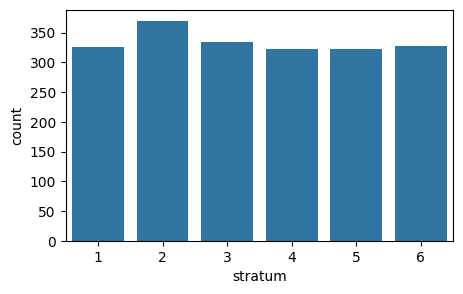

,count,proportion
stratum,,
1,325,0.1625
2,370,0.1850
3,334,0.1670
4,322,0.1610
5,322,0.1610
6,327,0.1635


In [ ]:
column = 'stratum'
plt.figure(figsize=(5, 3))
sns.barplot(housing_data[column].value_counts())
plt.xlabel(column)
plt.show()
pd.concat([housing_data[column].value_counts(), housing_data[column].value_counts(normalize=True)], axis = 1).sort_index()

#### *year_built*

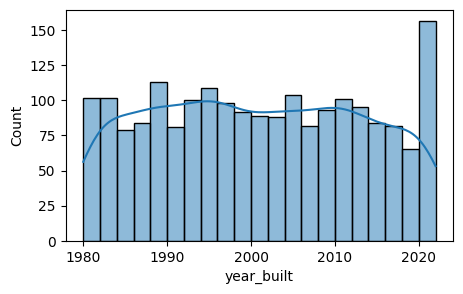

In [ ]:
column = 'year_built'
plt.figure(figsize=(5, 3))
sns.histplot(housing_data[column], binwidth=2, kde=True)
plt.xlabel(column)
plt.show()

#### *neighborhood*

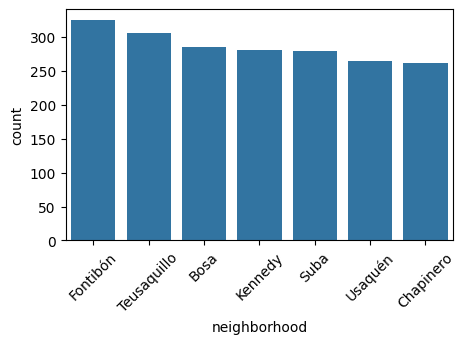

,count,proportion
neighborhood,,
Fontibón,324,0.1620
Teusaquillo,305,0.1525
Bosa,285,0.1425
Kennedy,280,0.1400
Suba,279,0.1395
Usaquén,265,0.1325
Chapinero,262,0.1310


In [ ]:
column = 'neighborhood'
plt.figure(figsize=(5, 3))
sns.countplot(housing_data, x=column, order=housing_data[column].value_counts().index)
plt.xlabel(column)
plt.xticks(rotation=45)
plt.show()
pd.concat([housing_data[column].value_counts(), housing_data[column].value_counts(normalize=True)], axis = 1)

#### *price*
El histograma y el rango intercuartílico sugieren una concentración de los datos entre los 275 y los 525 millones.

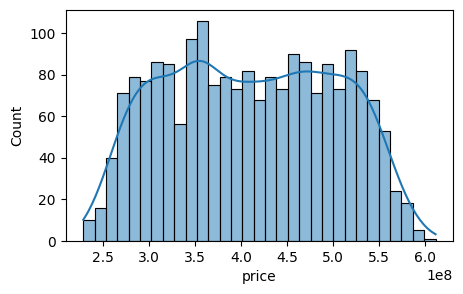

In [9]:
column = 'price'
plt.figure(figsize=(5, 3))
sns.histplot(housing_data[column], binwidth=12500000, kde=True)
plt.xlabel(column)
plt.show()

### Análisis de correlación
No existe una correlación significativa entre las características distintas del objetivo.

Existe una correlación fuerte entre el área y el precio de la vivienda (0.98).

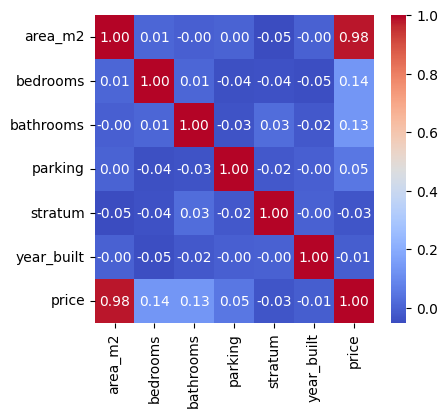

In [ ]:
correlation_matrix = housing_data.drop(['id', 'neighborhood'], axis=1).corr()
plt.figure(figsize=(4.5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#### Relación *area_m2* - *price*
Se grafica area_m2 vs price para estudiar en mayor detalle su relación. Se observa una relación lineal, lo que sugiere un regresor lineal como candidato para el modelo a entrenar.

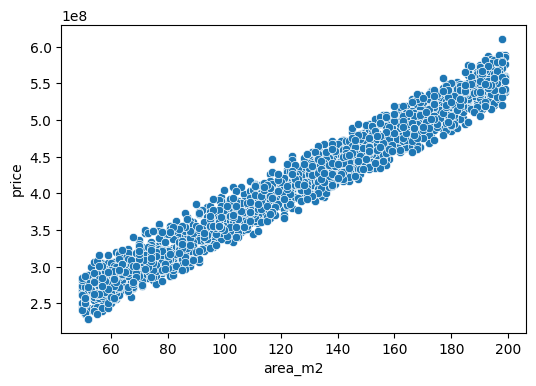

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=housing_data, x='area_m2', y='price')
plt.xlabel('area_m2')
plt.ylabel('price')
plt.show()

## División del conjunto de datos (80% entrenamiento - 20% prueba)
División del conjunto de datos previo preprocesamiento y entrenamiento de los modelos.

In [12]:
housing_data_features = housing_data.drop(['price', 'id'], axis=1)
housing_data_target = housing_data['price']
X_train, X_test, y_train, y_test = train_test_split(housing_data_features, housing_data_target, test_size=0.2, random_state=1)
print("Entrenamiento:", X_train.shape)
print("Prueba:", X_test.shape)

Entrenamiento: (1600, 7)
Prueba: (400, 7)


## Preprocesamiento

### Valores faltantes

No hay valores faltantes en los conjuntos de entrenamiento ni de prueba. Sin embargo, se generan imputadores en caso en caso de que existan valores faltantes en nuevos datos.

Los valores faltantes en las características numéricas serán imputados usando la media del conjunto de entrenamiento. Los valores faltantes en la variable categórica (neighborhood) serán imputados usando la moda en el conjunto de entrenamiento.

In [13]:
imputers = {}
mean_imputation_features = ['area_m2', 'bedrooms', 'bathrooms', 'parking', 'stratum', 'year_built']
for column in mean_imputation_features:
  imputers[column] = SimpleImputer(strategy='mean')
  imputers[column].fit(X_train[[column]])
imputers['neighborhood'] = SimpleImputer(strategy='most_frequent')
imputers['neighborhood'].fit(X_train[['neighborhood']])

SimpleImputer(strategy='most_frequent')

### Codificación de *neighborhood* (One-hot encoding)
La variable categórica (neighborhood) será codificada usando la estrategia one-hot encoding (hay un total de 7 categorías).

No se omite ninguna categoría para manejar la presencia de nuevas categorías en nuevos datos.

In [ ]:
neighborhood_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
neighborhood_features_train = neighborhood_encoder.fit_transform(X_train[['neighborhood']])
neighborhood_features_train = pd.DataFrame(neighborhood_features_train, columns=neighborhood_encoder.get_feature_names_out(['neighborhood']), index=X_train.index)
X_train_preprocessed = pd.concat([X_train, neighborhood_features_train], axis=1)
print(X_train_preprocessed.head())
X_train_preprocessed.drop('neighborhood', axis=1, inplace=True)

neighborhood_features_test = neighborhood_encoder.transform(X_test[['neighborhood']])
neighborhood_features_test = pd.DataFrame(neighborhood_features_test, columns=neighborhood_encoder.get_feature_names_out(['neighborhood']), index=X_test.index)
X_test_preprocessed = pd.concat([X_test, neighborhood_features_test], axis=1)
X_test_preprocessed.head()
X_test_preprocessed.drop('neighborhood', axis=1, inplace=True)

     area_m2  bedrooms  bathrooms  parking  stratum  year_built neighborhood  \
0        152         4          2        1        4        2021         Bosa   
816       62         4          2        1        6        2009         Suba   
790       93         4          2        0        1        2001    Chapinero   
361      186         4          1        0        5        1994      Usaquén   
592      148         2          2        0        3        2007         Suba   

     neighborhood_Bosa  neighborhood_Chapinero  neighborhood_Fontibón  \
0                  1.0                     0.0                    0.0   
816                0.0                     0.0                    0.0   
790                0.0                     1.0                    0.0   
361                0.0                     0.0                    0.0   
592                0.0                     0.0                    0.0   

     neighborhood_Kennedy  neighborhood_Suba  neighborhood_Teusaquillo  \
0     

### Normalización
Las variables numéricas son normalizadas en el intervalo [0, 1].

In [ ]:
normalized_features = ['area_m2', 'bedrooms', 'bathrooms', 'parking', 'stratum', 'year_built']
scaler = MinMaxScaler()
X_train_preprocessed[normalized_features] = scaler.fit_transform(X_train_preprocessed[normalized_features])
print(X_train_preprocessed.head())

X_test_preprocessed[normalized_features] = scaler.transform(X_test_preprocessed[normalized_features])
X_test_preprocessed.head()

      area_m2  bedrooms  bathrooms  parking  stratum  year_built  \
0    0.684564  1.000000        0.5      0.5      0.6    0.976190   
816  0.080537  1.000000        0.5      0.5      1.0    0.690476   
790  0.288591  1.000000        0.5      0.0      0.0    0.500000   
361  0.912752  1.000000        0.0      0.0      0.8    0.333333   
592  0.657718  0.333333        0.5      0.0      0.4    0.642857   

     neighborhood_Bosa  neighborhood_Chapinero  neighborhood_Fontibón  \
0                  1.0                     0.0                    0.0   
816                0.0                     0.0                    0.0   
790                0.0                     1.0                    0.0   
361                0.0                     0.0                    0.0   
592                0.0                     0.0                    0.0   

     neighborhood_Kennedy  neighborhood_Suba  neighborhood_Teusaquillo  \
0                     0.0                0.0                       0.0   
816 

,area_m2,bedrooms,bathrooms,parking,stratum,year_built,neighborhood_Bosa,neighborhood_Chapinero,neighborhood_Fontibón,neighborhood_Kennedy,neighborhood_Suba,neighborhood_Teusaquillo,neighborhood_Usaquén
674,0.402685,1.000000,0.5,1.0,0.8,0.380952,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1699,0.590604,1.000000,0.0,0.0,0.6,0.761905,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1282,0.053691,0.333333,0.5,1.0,0.8,0.095238,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1315,0.476510,0.333333,1.0,0.0,0.2,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1210,0.872483,0.000000,1.0,0.5,0.4,0.761905,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Entrenamiento de regresores
Entrenamiento de múltiples modelos de regresión:
* Regresión lineal con regularización L2
* Regresión lineal con regularización L1
* Árbol de decisión
* Random Forest
* Red neuronal
* K-nearest neighbors
* Gradient boosting
* XGBoost

Para cada uno de los algoritmos, se generaron modelos con diferentes configuraciones de hiperparámetros usando *grid search* y validación cruzada de 10 *folds*. Para cada algoritmo, los resultados del mejor modelo sobre el conjunto de prueba son presentados.

Los modelos de regresión lineal, XGBoost, Gradiente boosting, árbol de decisión y random forest mostraron un desempeño adecuado.

A continuación se presenta el RMSE y R^2 sobre el conjunto de prueba para los mejores modelos:

* Gradient boosting: {RMSE: 2429695.574717538,
 R^2: 0.9992720981330379}
* Regresión lineal con regularización L2: {RMSE: 2572281.79, R^2: 0.9991841577423154}
* Regresión lineal con regularización L1: {RMSE: 2572840.194750854,
 R^2: 0.9991838034929453}
* XGBoost: {RMSE: 4058052.5, R^2: 0.9979695081710815}
* Random Forest: {RMSE: 6450222.411023902, R^2: 0.9948699867405701}
* Árbol de decisión: {RMSE: 9714180.019784292,
 R^2: 0.9883645977302004}


### Funciones de entrenamiento y evaluación

In [ ]:
def train_model_grid_search(algorithm, grid_params, features=None):
  grid_cv = GridSearchCV(algorithm, grid_params, verbose=5, n_jobs=-1, cv=10, return_train_score=True, scoring='neg_root_mean_squared_error')
  grid_cv.fit(X_train if features is None else X_train[features], y_train)
  print(grid_cv.best_score_)
  print(grid_cv.best_params_)
  return grid_cv.best_estimator_

def evaluate_model(model, features=None):
  y_pred = model.predict(X_test if features is None else X_test[features])
  return {  'RMSE': root_mean_squared_error(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'R^2': r2_score(y_test, y_pred)}

### Baseline (media de y_train)

In [ ]:
algorithm = DummyRegressor(strategy='mean')
model = algorithm.fit(X_train, y_train)
evaluate_model(model)

{'RMSE': 90059303.2719502,
 'MAE': 77334343.4375,
 'R^2': -6.0498782893825265e-05}

### Regresión lineal + regularización L2

In [ ]:
algorithm = Ridge(random_state=100)
grid_params = {'alpha': np.logspace(-3, 3, 7)}
model = train_model_grid_search(algorithm, grid_params)
evaluate_model(model)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
-2507364.0402178476
{'alpha': 0.001}


{'RMSE': 2572281.7961744973,
 'MAE': 1807946.0595252372,
 'R^2': 0.9991841577423154}

### Regresión lineal + regularización L1


In [ ]:
algorithm = Lasso(random_state=100)
grid_params = {'alpha': np.logspace(-3, 3, 11)}
model = train_model_grid_search(algorithm, grid_params)
evaluate_model(model)

Fitting 10 folds for each of 11 candidates, totalling 110 fits
-2507257.579597835
{'alpha': 1000.0}


{'RMSE': 2572840.194750854,
 'MAE': 1807430.2827307293,
 'R^2': 0.9991838034929453}

### Árbol de decisión

In [ ]:
algorithm = DecisionTreeRegressor(criterion='squared_error', splitter='best', random_state=100)
grid_params = { 'max_depth':[None, 5, 10, 20, 50],
                'min_samples_split':[2, 10, 20],
                'min_impurity_decrease':[0.0, 1e-4, 1e-3, 1e-2]}
model = train_model_grid_search(algorithm, grid_params)
evaluate_model(model)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
-10359140.961000348
{'max_depth': None, 'min_impurity_decrease': 0.0, 'min_samples_split': 10}


{'RMSE': 9714180.019784292,
 'MAE': 7585163.690476191,
 'R^2': 0.9883645977302004}

### Random Forest

In [ ]:
algorithm = RandomForestRegressor(n_estimators=500, criterion='squared_error', max_features=None, n_jobs=-1, random_state=100)
grid_params = { 'max_depth':[None, 1, 5, 10],
                'min_samples_split':[2, 5, 10],
                'min_impurity_decrease':[0.0, 1e-4, 1e-3]}
model = train_model_grid_search(algorithm, grid_params)
evaluate_model(model)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
-6523270.757781753
{'max_depth': None, 'min_impurity_decrease': 0.0, 'min_samples_split': 2}


{'RMSE': 6450222.411023902, 'MAE': 4948846.25, 'R^2': 0.9948699867405701}

### Red neuronal (multilayer perceptron)

In [ ]:
layer_size = len(X_train.columns)
algorithm = MLPRegressor(max_iter=50000, learning_rate='adaptive', warm_start=True, early_stopping=True, random_state=100)
grid_params = { 'hidden_layer_sizes':[(layer_size,), (layer_size, layer_size), (layer_size, layer_size, layer_size), (layer_size, layer_size, layer_size, layer_size)],
               'activation': ['tanh', 'relu', 'logistic'],
               'alpha': np.logspace(-4, 4, 5)}
model = train_model_grid_search(algorithm, grid_params)
evaluate_model(model)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
-419856316.5997704
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (13, 13, 13, 13)}


{'RMSE': 420632170.47175795,
 'MAE': 410878613.9985163,
 'R^2': -20.81594740449037}

### KNN

In [ ]:
algorithm = KNeighborsRegressor()
grid_params = {'n_neighbors':[1, 5, 25],
          'weights':['uniform', 'distance'],
          'p':range(1, 3)}
model = train_model_grid_search(algorithm, grid_params)
evaluate_model(model)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
-38602388.95974131
{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


{'RMSE': 37809372.66422087, 'MAE': 30386482.05290351, 'R^2': 0.823734202176196}

### GradientBoosting

In [ ]:
algorithm = GradientBoostingRegressor(n_estimators=500)
grid_params = { 'learning_rate':np.logspace(-3, 3, 7),
                'max_depth':[None, 1, 5, 10],
                'min_samples_split':[2, 5, 10],
                'min_impurity_decrease':[0.0, 1e-4, 1e-3]}
model = train_model_grid_search(algorithm, grid_params)
evaluate_model(model)

Fitting 10 folds for each of 252 candidates, totalling 2520 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning: One or more of the test scores are non-finite: [-54877255.3050008  -54939633.52206546 -54900439.20321982
 -54875869.55987598 -54938175.35520677 -54900470.29274257
 -54877248.34774288 -54938802.37670581 -54899991.64691567
 -64755681.43758792 -64755681.43758792 -64755681.43758793
 -64755681.4375879  -64755681.4375879  -64755681.43758792
 -64755681.43758793 -64755681.4375879  -64755681.4375879
 -55506395.69923794 -55506395.69923796 -55506395.69923796
 -55506395.69923794 -55506395.69923796 -55506395.69923796
 -55506395.69923796 -55506395.69923796 -55506395.69923794
 -54882909.45963607 -54883476.12417547 -54899318.32106172
 -54883262.50254418 -54885310.05258459 -54899576.07413892
 -54882000.02872086 -54885470.45627733 -54898965.14739347
 -10102274.94954625  -8011881.95336433  -5946005.74096848
 -10106836.57879349  -8008682.47808441  -5957453.90243869
 -10097818.32392807  -8009096.44281413  -5951091

-2599685.6871225163
{'learning_rate': 0.1, 'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}


{'RMSE': 2429695.574717538,
 'MAE': 1879969.7590141795,
 'R^2': 0.9992720981330379}

### XGBoost

In [ ]:
algorithm = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=None, alpha=10, n_estimators=500)
model = algorithm.fit(X_train, y_train)
evaluate_model(model)

{'RMSE': 4058052.5, 'MAE': 3195730.0, 'R^2': 0.9979695081710815}